In [1]:
import pandas as pd
import numpy as np
import pyarrow.parquet as pq
import seaborn as sns
import matplotlib.pyplot as plt
import pickle



In [2]:
from sklearn.preprocessing import MinMaxScaler
from mlxtend.plotting import plot_learning_curves
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score, recall_score
from matplotlib import pyplot as plt
from sklearn.metrics import log_loss
plt.rcParams.update({'figure.figsize' : (12.0, 8.0)})
plt.rcParams.update({'font.size' : 14})

In [3]:
#Fetching the pre processed dataset
columns=['µStrain', 'µStrain.1', 'µStrain.2', 'µStrain.3', 'µStrain.4', 'µStrain.5', 'µStrain.6', 'µStrain.7', 'µStrain.8', 'µStrain.9', 'µStrain.10', 'µStrain.11', 'µStrain.12', 'µStrain.13', 'µStrain.14', 'µStrain.15', 'µStrain.16', 'µStrain.17', 'µStrain.18', 'µStrain.19', 'µStrain.20', 'µStrain.21', 'µStrain.22', 'µStrain.23', 'µStrain.24', 'µStrain.25', 'µStrain.26', 'µStrain.27', 'µStrain.28', 'µStrain.29', 'µStrain.30', 'µStrain.31', 'µStrain.32', 'µStrain.33', 'µStrain.34', 'µStrain.35', 'µStrain.36', 'µStrain.37', 'µStrain.38', 'µStrain.39', 'µStrain.40', 'µStrain.41', 'µStrain.42', 'µStrain.43', 'µStrain.44', 'µStrain.45', 'µStrain.46', 'µStrain.47', 'µStrain.48', 'µStrain.49', 'µStrain.50', 'µStrain.51', 'µStrain.52', 'µStrain.53','µStrain.54','µStrain.55','µStrain.56','µStrain.57','µStrain.58','µStrain.59','µStrain.60','µStrain.61', 'Target']
df = pd.read_parquet('/Users/piyush/StudienArbeit/df_u.parquet',columns=columns) 

values = ['0.0-_LL-FXXf', '0.6-_LL-FXXf', '0.2-_LL-FXXf', '0.4-_LL-FXXf', '0.5-_LL-FXXf', '0.65-_LL-FXXf', '0.7-_LL-FXXf', '0.75-_LL-FXXf' 
, '0.0-_LL-LBLf', '0.6-_LL-LBLf', '0.2-_LL-LBLf', '0.4-_LL-LBLf', '0.5-_LL-LBLf', '0.65-_LL-LBLf', '0.7-_LL-LBLf', '0.75-_LL-LBLf'
, '0.0-_LL-VBDf', '0.6-_LL-VBDf', '0.2-_LL-VBDf', '0.4-_LL-VBDf', '0.5-_LL-VBDf', '0.65-_LL-VBDf', '0.7-_LL-VBDf', '0.75-_LL-VBDf']
df = df[df.Target.isin(values) == True]

column_to_replace = ['µStrain', 'µStrain.1', 'µStrain.2', 'µStrain.3', 'µStrain.4', 'µStrain.5', 'µStrain.6', 'µStrain.7', 'µStrain.8', 'µStrain.9', 'µStrain.10', 'µStrain.11', 'µStrain.12', 'µStrain.13', 'µStrain.14', 'µStrain.15', 'µStrain.16', 'µStrain.17', 'µStrain.18', 'µStrain.19', 'µStrain.20', 'µStrain.21', 'µStrain.22', 'µStrain.23', 'µStrain.24', 'µStrain.25', 'µStrain.26', 'µStrain.27', 'µStrain.28', 'µStrain.29', 'µStrain.30', 'µStrain.31', 'µStrain.32', 'µStrain.33', 'µStrain.34', 'µStrain.35', 'µStrain.36', 'µStrain.37', 'µStrain.38', 'µStrain.39', 'µStrain.40', 'µStrain.41', 'µStrain.42', 'µStrain.43', 'µStrain.44', 'µStrain.45', 'µStrain.46', 'µStrain.47', 'µStrain.48', 'µStrain.49', 'µStrain.50', 'µStrain.51', 'µStrain.52', 'µStrain.53','µStrain.54','µStrain.55','µStrain.56','µStrain.57','µStrain.58','µStrain.59','µStrain.60','µStrain.61']
for column in column_to_replace:
    df[column] = df[column].fillna(0)

def find_replace(target):
    if target=='0.0-_LL-FXXf':
        return '0'
    elif target=='0.0-_LL-LBLf':
        return '0'
    elif target == '0.0-_LL-VBDf':
        return '0'
    else :
        return target
    

df['Target1'] = df['Target'].apply(find_replace)

print(df)


print('Shape of the dataset:' +str(df.shape) )
print(df.head(-5))
print(df['Target'].unique())
print(list(df.isnull().sum()))
df.info()

         µStrain  µStrain.1  µStrain.2  µStrain.3  µStrain.4  µStrain.5  \
0          399.5      384.2      541.4      500.2      305.5      315.7   
1          402.6      386.2      544.2      502.2      305.8      317.1   
2          400.5      385.9      541.4      502.3      304.6      315.9   
3          400.6      384.9      541.5      501.6      304.0      316.2   
4          401.5      385.2      541.4      502.1      303.8      316.6   
...          ...        ...        ...        ...        ...        ...   
4240278    335.7      319.5      486.5      431.3      278.4      267.1   
4240279    335.7      320.2      487.3      431.1      279.5      267.0   
4240280    324.9      309.9      472.2      420.1      270.3      260.1   
4240281    324.9      309.9      472.2      420.1      270.3      260.1   
4240282    322.7      307.8      470.0      418.2      269.3      259.0   

         µStrain.6  µStrain.7  µStrain.8  µStrain.9  ...  µStrain.54  \
0            316.0       68

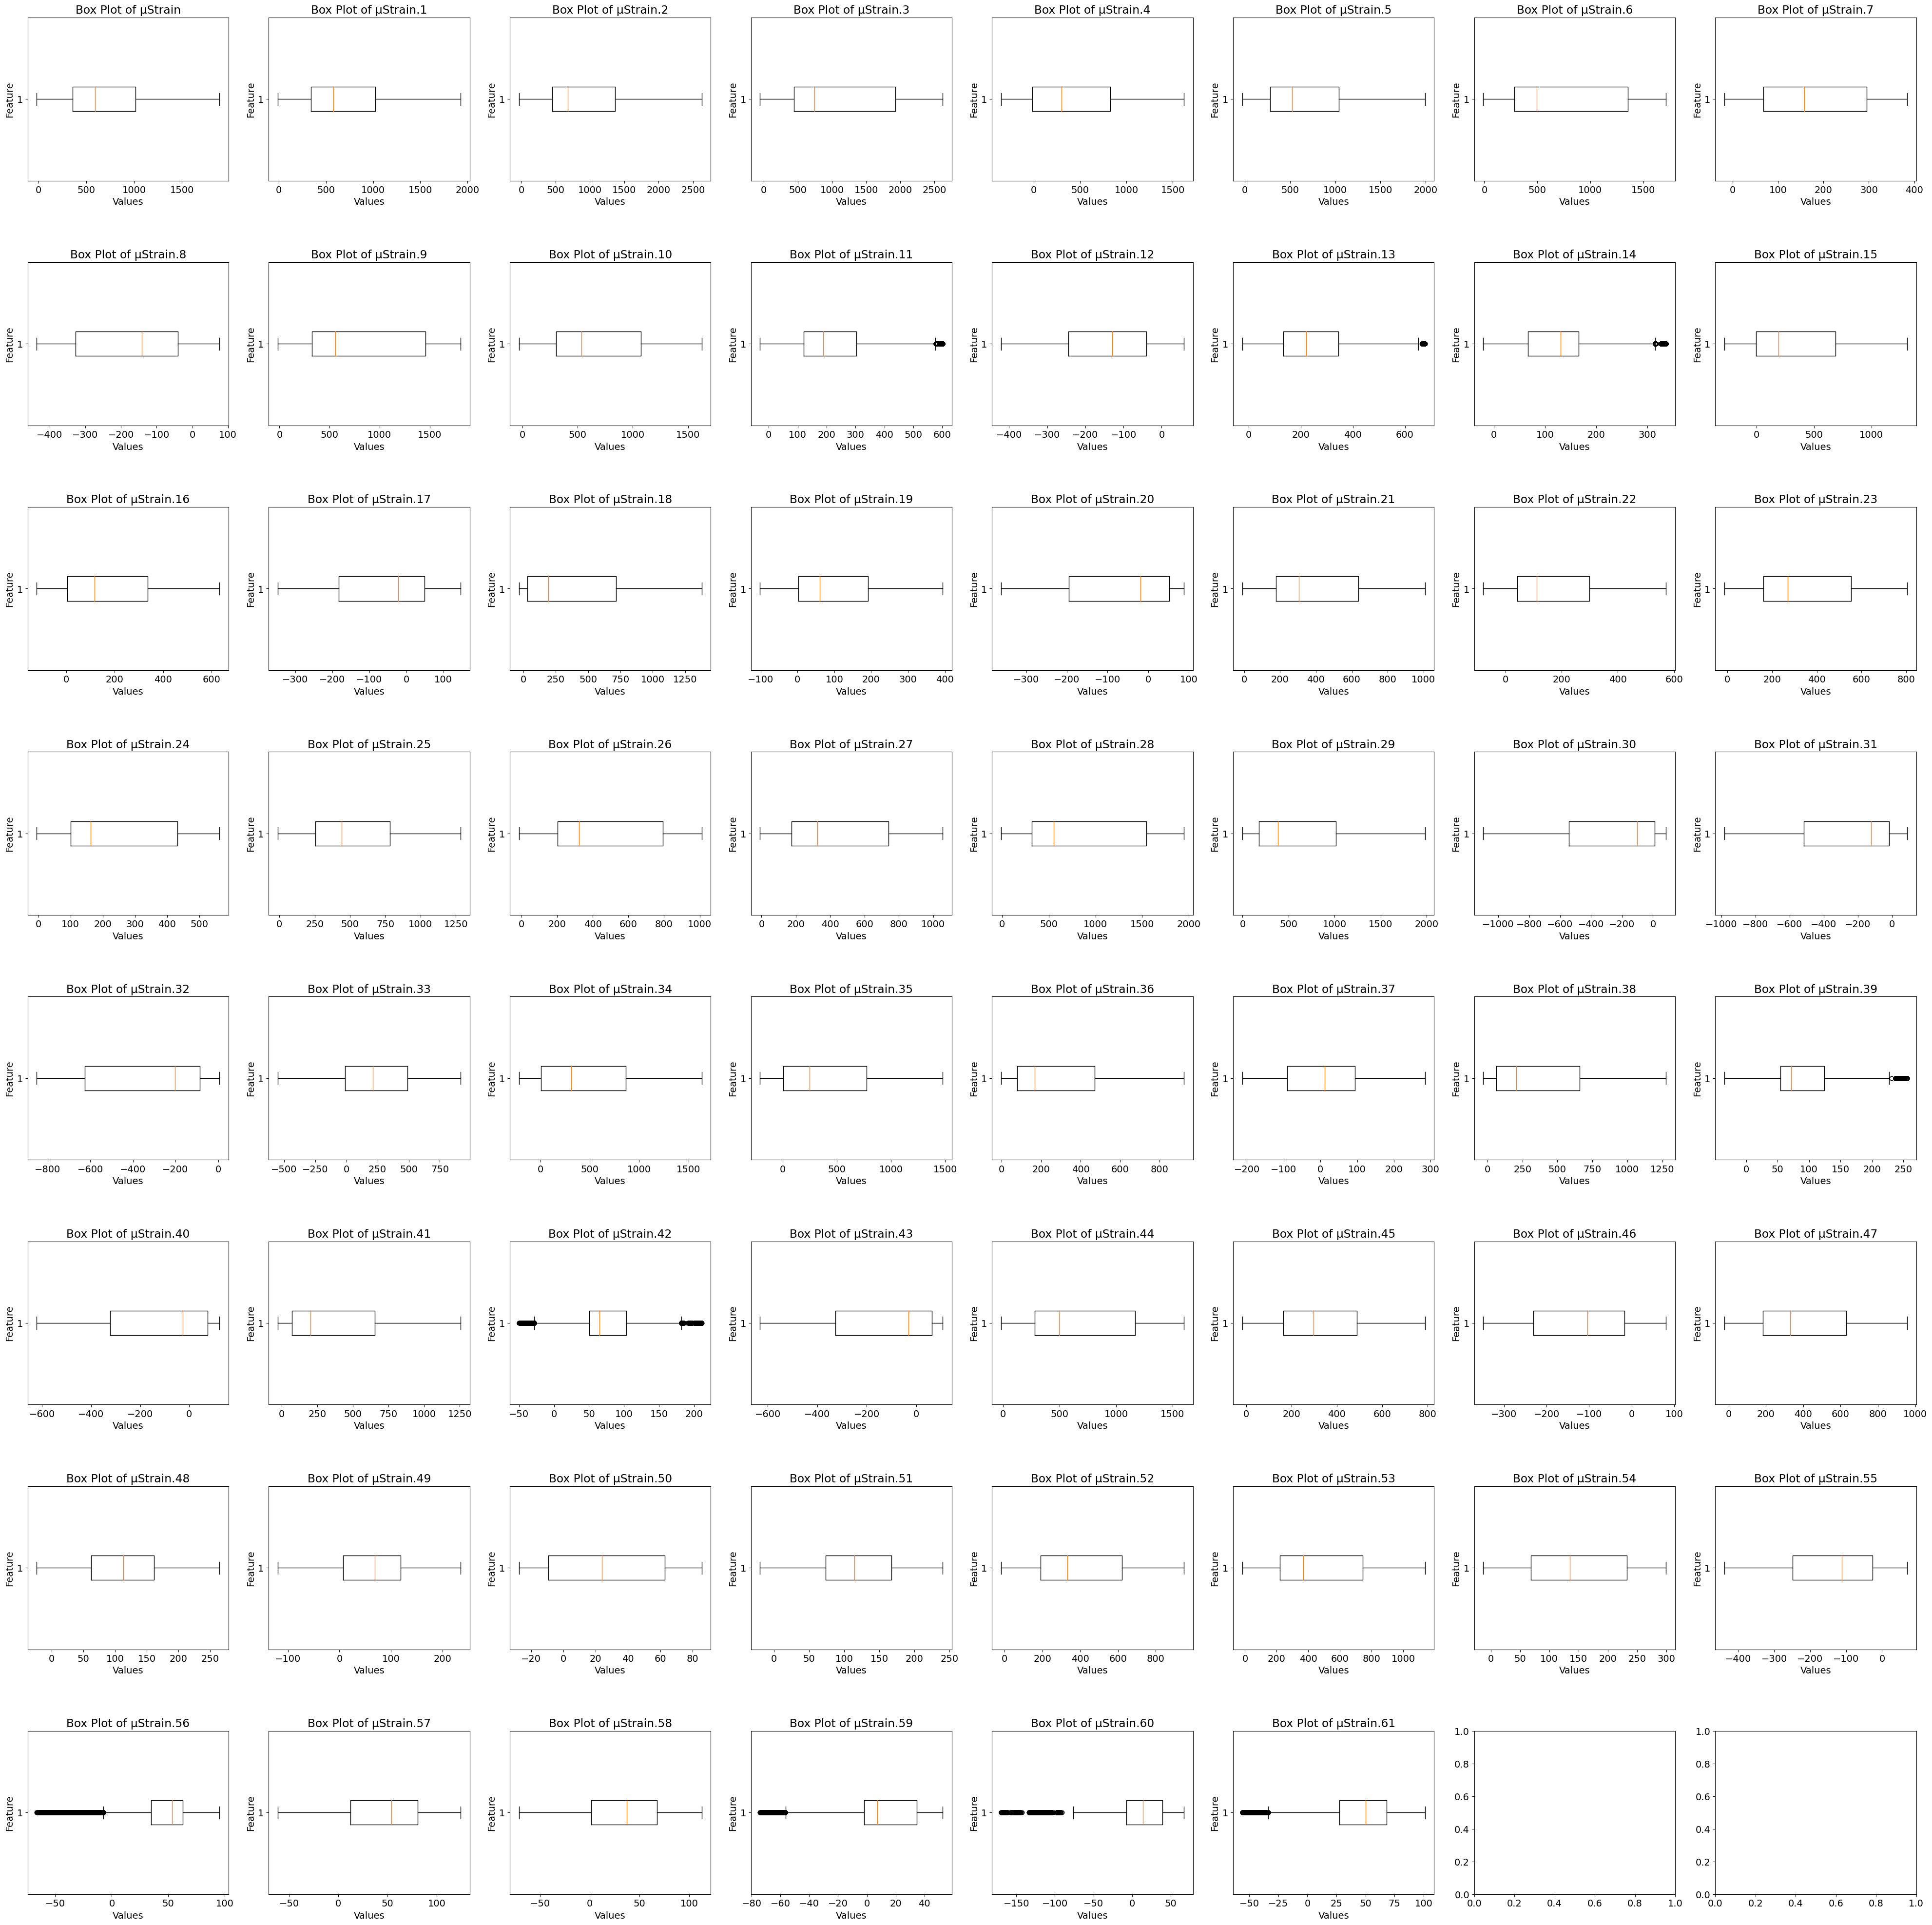

In [4]:
#BoxPlot
selected_feature = ['µStrain', 'µStrain.1', 'µStrain.2', 'µStrain.3', 'µStrain.4', 'µStrain.5', 'µStrain.6', 'µStrain.7', 'µStrain.8', 'µStrain.9', 'µStrain.10', 'µStrain.11', 'µStrain.12', 'µStrain.13', 'µStrain.14', 'µStrain.15', 'µStrain.16', 'µStrain.17', 'µStrain.18', 'µStrain.19', 'µStrain.20', 'µStrain.21', 'µStrain.22', 'µStrain.23', 'µStrain.24', 'µStrain.25', 'µStrain.26', 'µStrain.27', 'µStrain.28', 'µStrain.29', 'µStrain.30', 'µStrain.31', 'µStrain.32', 'µStrain.33', 'µStrain.34', 'µStrain.35', 'µStrain.36', 'µStrain.37', 'µStrain.38', 'µStrain.39', 'µStrain.40', 'µStrain.41', 'µStrain.42', 'µStrain.43', 'µStrain.44', 'µStrain.45', 'µStrain.46', 'µStrain.47', 'µStrain.48', 'µStrain.49', 'µStrain.50', 'µStrain.51', 'µStrain.52', 'µStrain.53','µStrain.54','µStrain.55','µStrain.56','µStrain.57','µStrain.58','µStrain.59','µStrain.60','µStrain.61']
rows = 8
cols = 8
fig, axes = plt.subplots(rows, cols, figsize=(50,50))
fig.subplots_adjust(hspace=0.5)

for i, feature in enumerate(selected_feature):
    ax = axes[i // cols, i % cols]
    ax.boxplot(df[feature], vert=False)
    ax.set_title(f'Box Plot of {feature}')
    ax.set_xlabel('Values')
    ax.set_ylabel('Feature')

plt.show()

In [5]:
column_to_replace = ['µStrain.11', 'µStrain.13', 'µStrain.14', 'µStrain.39', 'µStrain.42','µStrain.56','µStrain.59','µStrain.60','µStrain.61']
def replace_outliers_with_mode(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), df[column].mode().iloc[0], df[column])

for column in column_to_replace:
    replace_outliers_with_mode(column)

print(df)
print(list(df.isnull().sum()))

         µStrain  µStrain.1  µStrain.2  µStrain.3  µStrain.4  µStrain.5  \
0          399.5      384.2      541.4      500.2      305.5      315.7   
1          402.6      386.2      544.2      502.2      305.8      317.1   
2          400.5      385.9      541.4      502.3      304.6      315.9   
3          400.6      384.9      541.5      501.6      304.0      316.2   
4          401.5      385.2      541.4      502.1      303.8      316.6   
...          ...        ...        ...        ...        ...        ...   
4240278    335.7      319.5      486.5      431.3      278.4      267.1   
4240279    335.7      320.2      487.3      431.1      279.5      267.0   
4240280    324.9      309.9      472.2      420.1      270.3      260.1   
4240281    324.9      309.9      472.2      420.1      270.3      260.1   
4240282    322.7      307.8      470.0      418.2      269.3      259.0   

         µStrain.6  µStrain.7  µStrain.8  µStrain.9  ...  µStrain.54  \
0            316.0       68

In [6]:
label_encoder = LabelEncoder()
df['Target1'] = label_encoder.fit_transform(df.loc[:,'Target1'])
print(df['Target1'].unique())
print(df['Target1'].value_counts())
y = df['Target1']
print(y)



[ 8 11 14 17 20  5  0  3  6  9 12 15 18 21  1  4  7 10 13 16 19  2]
Target1
0     723179
10    310612
4     310606
11    309407
5     300926
19    206869
6     206275
12    206271
20    206271
21    206264
2     116306
13    103740
16    103740
7     103738
1     103737
9     103140
18    103140
15    103139
14    103139
17    103138
8     103136
3     103132
Name: count, dtype: int64
0          8
1          8
2          8
3          8
4          8
          ..
4240278    5
4240279    5
4240280    2
4240281    2
4240282    2
Name: Target1, Length: 4239905, dtype: int64


In [16]:
#Splitting the data into dependent and independent variables
X = df.iloc[:, 0:61].values
y = df.iloc[: , 63].values

print('The independent feature set: ')
print(X[:5, :])
print('The dependent variable: ')
print(y[:-5])


The independent feature set: 
[[ 399.5  384.2  541.4  500.2  305.5  315.7  316.    68.8  -90.4  370.
   270.4   71.7 -139.7  127.5   52.9  195.4  111.4  -53.8  129.5   -7.8
  -105.5  192.6  106.1  156.7  127.2  276.6  215.6  189.9  361.   416.1
  -113.4 -122.1  -89.5  225.9  325.2  254.6  164.4   20.4  197.3   37.5
   -75.4  193.3   26.3  -87.9  308.6  163.3  -67.3  178.4   65.7   67.4
    20.7   71.3  191.4  229.1   74.4  -62.6   39.4   57.3   34.5   14.7
    29.7]
 [ 402.6  386.2  544.2  502.2  305.8  317.1  316.7   69.6  -89.7  370.7
   271.4   72.2 -139.4  127.6   52.8  195.3  111.2  -53.5  129.9   -6.6
  -105.8  193.1  107.1  157.4  127.7  277.2  215.8  191.1  361.6  416.1
  -113.2 -121.4  -89.   225.3  325.8  254.2  164.5   21.4  197.8   37.7
   -74.8  194.    26.8  -88.5  309.3  163.9  -67.1  180.1   65.2   67.5
    20.5   72.   192.6  230.1   75.1  -63.    39.6   58.2   34.6   14.7
    29.3]
 [ 400.5  385.9  541.4  502.3  304.6  315.9  315.8   68.5  -90.5  371.7
   272.    72.1

In [17]:
train_data, test_data = train_test_split(df, test_size=0.3, random_state=42)
print(train_data.shape)
print(test_data.shape)

(2967933, 64)
(1271972, 64)


In [18]:
#splitting the dataset into training and testing set

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
print ('Feature Training Set:', X_train.shape)
print('Feature Testing Set:', X_test.shape)
print('Label Trainhing Set:', y_train.shape)
print('Label Testing Set:', y_test.shape)


Feature Training Set: (2967933, 61)
Feature Testing Set: (1271972, 61)
Label Trainhing Set: (2967933,)
Label Testing Set: (1271972,)


In [19]:
#Fitting Multi Layer Perceptron classifier to the training data
classifier = MLPClassifier(hidden_layer_sizes=(100,50), max_iter=1000,alpha=0.00001,early_stopping=True,  activation='relu', solver='adam', random_state=42)



In [20]:
ovr = OneVsRestClassifier(classifier)
ovr.fit(X_train, y_train)
pred = ovr.predict(X_test)
print('OVR Accuracy:' , accuracy_score(y_test, pred))

OVR Accuracy: 0.9769932042529238


In [21]:
pickle.dump(ovr, open('OVR_classifier.pk1', 'wb'))

In [22]:
unique = np.unique(y_test)
print(unique)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21]


In [23]:
from sklearn.discriminant_analysis import unique_labels


def plot(y_test, pred):
    columns = ['0', '0.2-_LL-FXXf', '0.2-_LL-LBLf', '0.2-_LL-VBDf', '0.4-_LL-FXXf', '0.4-_LL-LBLf', '0.4-_LL-VBDf', '0.5-_LL-FXXf', '0.5-_LL-LBLf','0.5-_LL-VBDf','0.6-_LL-FXXf', '0.6-_LL-LBLf', '0.6-_LL-VBDf', '0.65-_LL-FXXf', '0.65-_LL-LBLf', '0.65-_LL-VBDf', '0.7-_LL-FXXf', '0.7-_LL-LBLf', '0.7-_LL-VBDf', '0.75-_LL-FXXf', '0.75-_LL-LBLf', '0.75-_LL-VBDf' ]
    index = ['0', '0.2-_LL-FXXf', '0.2-_LL-LBLf', '0.2-_LL-VBDf', '0.4-_LL-FXXf', '0.4-_LL-LBLf', '0.4-_LL-VBDf', '0.5-_LL-FXXf', '0.5-_LL-LBLf','0.5-_LL-VBDf','0.6-_LL-FXXf', '0.6-_LL-LBLf', '0.6-_LL-VBDf', '0.65-_LL-FXXf', '0.65-_LL-LBLf', '0.65-_LL-VBDf', '0.7-_LL-FXXf', '0.7-_LL-LBLf', '0.7-_LL-VBDf', '0.75-_LL-FXXf', '0.75-_LL-LBLf', '0.75-_LL-VBDf' ]
    table = pd.DataFrame(confusion_matrix(y_test, pred),
                         columns = columns, index = index)
    return table
plot(y_test, pred)

,0,0.2-_LL-FXXf,0.2-_LL-LBLf,0.2-_LL-VBDf,0.4-_LL-FXXf,0.4-_LL-LBLf,0.4-_LL-VBDf,0.5-_LL-FXXf,0.5-_LL-LBLf,0.5-_LL-VBDf,...,0.6-_LL-VBDf,0.65-_LL-FXXf,0.65-_LL-LBLf,0.65-_LL-VBDf,0.7-_LL-FXXf,0.7-_LL-LBLf,0.7-_LL-VBDf,0.75-_LL-FXXf,0.75-_LL-LBLf,0.75-_LL-VBDf
0,216260,0,0,0,0,0,0,2,0,0,...,0,0,0,0,0,0,0,1,0,0
0.2-_LL-FXXf,0,31003,0,0,16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.2-_LL-LBLf,0,0,34945,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.2-_LL-VBDf,0,0,0,31070,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.4-_LL-FXXf,0,0,0,0,93160,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.4-_LL-LBLf,0,0,0,0,0,90167,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.4-_LL-VBDf,0,0,0,0,0,0,61844,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0.5-_LL-FXXf,0,0,0,0,0,0,0,31027,0,0,...,0,0,0,0,0,0,0,0,0,0
0.5-_LL-LBLf,0,0,0,0,0,0,0,0,30579,0,...,0,0,0,0,0,0,0,0,0,0
0.5-_LL-VBDf,0,0,0,0,0,0,0,0,0,31176,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Confusion Matrix for Load Condition')


<Axes: title={'center': 'Confusion Matrix for Load Condition'}>

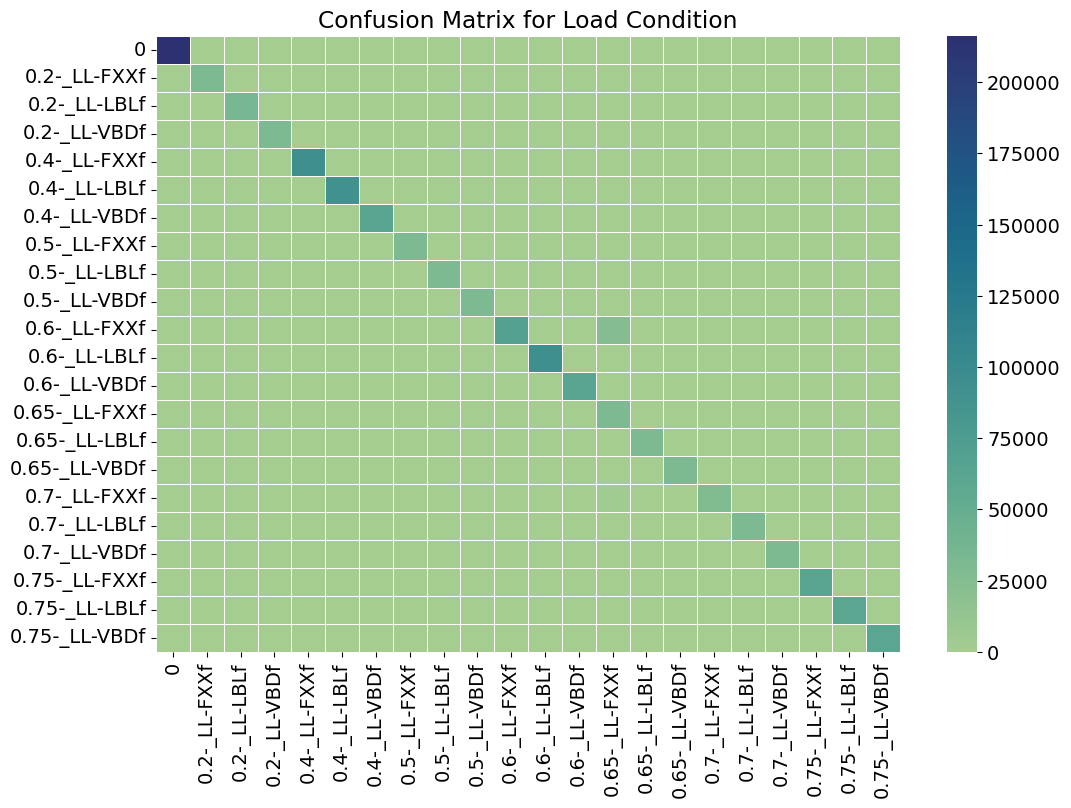

In [24]:
from sklearn.utils.multiclass import unique_labels
unique_labels(y_test)

#combine labels with confusion matrix
def plot(y_test, predictions):
    columns = ['0', '0.2-_LL-FXXf', '0.2-_LL-LBLf', '0.2-_LL-VBDf', '0.4-_LL-FXXf', '0.4-_LL-LBLf', '0.4-_LL-VBDf', '0.5-_LL-FXXf', '0.5-_LL-LBLf','0.5-_LL-VBDf','0.6-_LL-FXXf', '0.6-_LL-LBLf', '0.6-_LL-VBDf', '0.65-_LL-FXXf', '0.65-_LL-LBLf', '0.65-_LL-VBDf', '0.7-_LL-FXXf', '0.7-_LL-LBLf', '0.7-_LL-VBDf', '0.75-_LL-FXXf', '0.75-_LL-LBLf', '0.75-_LL-VBDf' ]
    index = ['0', '0.2-_LL-FXXf', '0.2-_LL-LBLf', '0.2-_LL-VBDf', '0.4-_LL-FXXf', '0.4-_LL-LBLf', '0.4-_LL-VBDf', '0.5-_LL-FXXf', '0.5-_LL-LBLf','0.5-_LL-VBDf','0.6-_LL-FXXf', '0.6-_LL-LBLf', '0.6-_LL-VBDf', '0.65-_LL-FXXf', '0.65-_LL-LBLf', '0.65-_LL-VBDf', '0.7-_LL-FXXf', '0.7-_LL-LBLf', '0.7-_LL-VBDf', '0.75-_LL-FXXf', '0.75-_LL-LBLf', '0.75-_LL-VBDf' ]
    table = pd.DataFrame(confusion_matrix(y_test, pred),
                         columns = columns, index = index)
    return sns.heatmap(table, annot=False,fmt='d', cmap='crest', linewidths=0.5)
print(plt.title('Confusion Matrix for Load Condition'))
plot(y_test, pred)

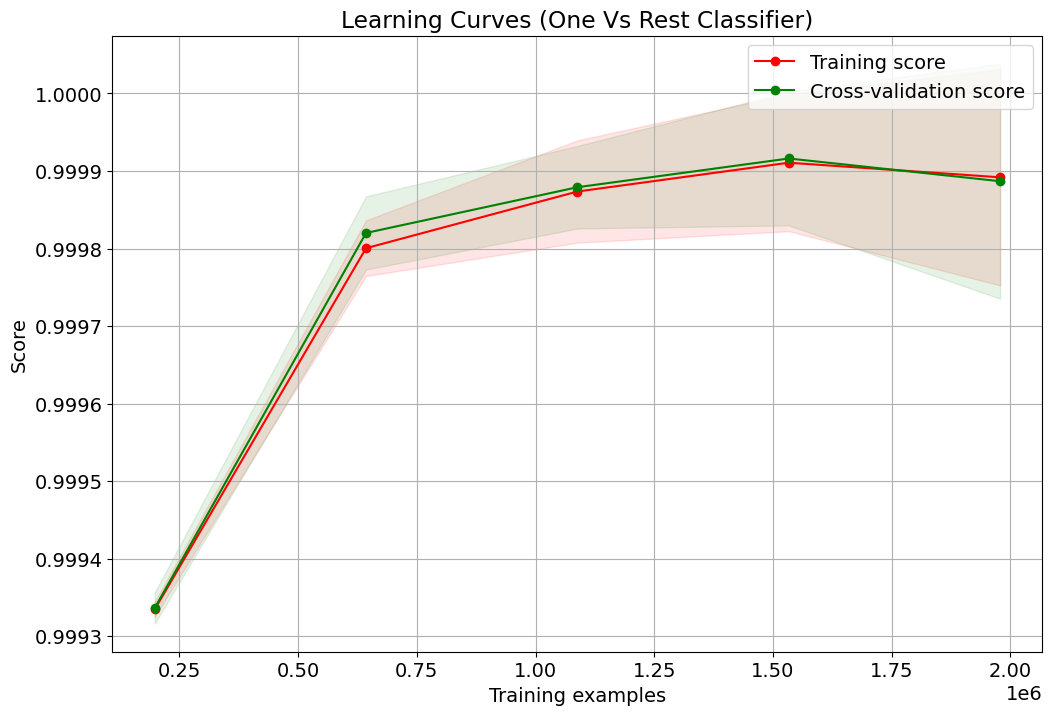

In [26]:
def plot_learning_curves(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot the learning curves
plot_learning_curves(classifier, "Learning Curves (One Vs Rest Classifier)", X_train, y_train, cv=3, n_jobs=-1)

plt.show()
